In [125]:
import pandas as pd

In [126]:
import numpy as np

In [127]:
import matplotlib.pyplot as plt

In [128]:
import seaborn as sns

In [129]:
df = pd.read_csv('train.csv',header=0)

In [130]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1 - Who survived and who did not

In [131]:
# Starting with extracting the data for survivors
# Total number of passengers is 891
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [132]:
df.Survived.value_counts('Sex')

0    0.616162
1    0.383838
Name: Survived, dtype: float64

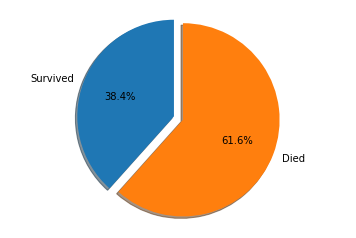

In [133]:
# After getting the numbers and the percentage of survivors not I am using the Pie chart to visualize it


labels = 'Survived', 'Died'
sizes = [(100/8.91)*3.42, (100/8.91)*5.49]
# another way of calculating the percentage
# it is also correct to write down 62 dead and 38 survived

explode = (0.1, 0)
#"explodind" the 1st slice ('Survived')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
# no figure sizing is needed here

plt.show()

In [134]:
# Rounded summary:
# Survived = 38%
# Died = 62%

# More than half of the passengers have died during the accident

### 2 - Dividing survivors and dead into female and male groups

In [135]:
df.Sex.value_counts()
# Total number of female and male passengers

male      577
female    314
Name: Sex, dtype: int64

In [136]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [137]:
# After making the list for women and men that survived and not it is known that:
# Women - Survived=233; Died=81;
# Men -   Survived=109; Died=468

# The retrieved information is used in the creation of bar chart that will visually represent it.

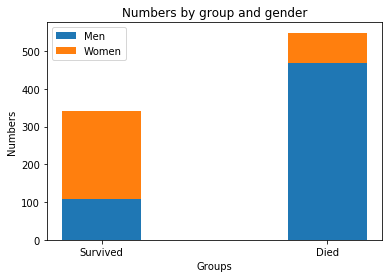

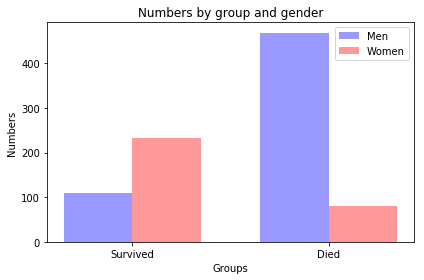

In [138]:
import numpy as np
import matplotlib.pyplot as plt


N = 2
menMeans = (109, 468)
womenMeans = (233, 81)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)

plt.xlabel('Groups')
plt.ylabel('Numbers')
plt.title('Numbers by group and gender')
plt.xticks(ind, ('Survived', 'Died'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

#--------------------------------------------------------

n_groups = 2

means_men = (109, 468)


means_women = (233, 81)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}
# Adjusting the color saturation

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Women')

ax.set_xlabel('Groups')
ax.set_ylabel('Numbers')
ax.set_title('Numbers by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Survived', 'Died'))
ax.legend()

fig.tight_layout()
plt.show()


plt.show()



# The Stacked Bar chart can give us good overview of the total numbers of Survived and Died (as well as the individual)
# The Normal Bar Chart can give us better comparison in the ration between the individual bar numbers numbers

In [139]:
# The Bar Chart visually represents the big difference in number, who survived and who did not
# It can be sait that women may have had the privilage to go first and that is why the number of deaths
# in the group of men is so big

In [140]:
# The next step would be to dvide the total amount of passengers in groups and see who survived according to their Pclass

### 3 - Analyzing the survivors acording to their Passenger Class

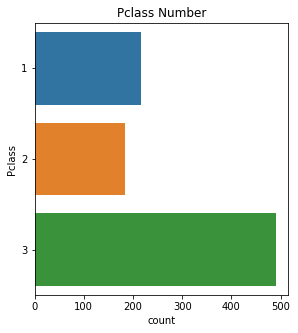

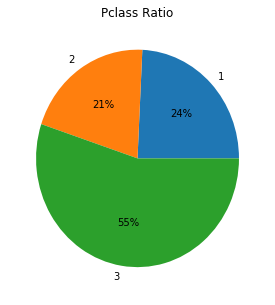

In [141]:
# In Total!
# This is before the accident to happen

df[['Pclass','Survived']].groupby(['Pclass']).count()
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(y='Pclass', data=df)
plt.title('Pclass Number') 

plt.figure(figsize= (10 ,5))
# Setting figure Size
plt.subplot(121)
plt.title('Pclass Ratio')
plt.pie(df[['Pclass','Survived']].groupby(['Pclass']).count(),\
        labels=['1','2','3'],autopct='%1.0f%%')

plt.show()

In [142]:
# Class 1 - 24%
# Class 2 - 21%
# Class 3 - 55%

# Class 1 and 2 are almost with the same ration, and their sum is close to 1/2 of the passengers. Where the highest
# ratio of passengers is Class 3. This shows the majority of people were not so rich/ with less resounces.

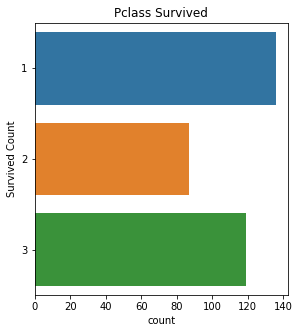

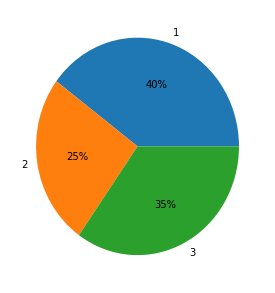

In [143]:
# This step divides the people who survived according to their class

Survived = df[df['Survived'] == 1 ]
Survived[['Pclass','Survived']].groupby(['Pclass']).sum()
plt.figure(figsize= (10 ,5))
plt.subplot(121)

sns.countplot(y='Pclass', data=Survived)
plt.title('Pclass Survived') 
plt.ylabel('Survived Count')
plt.figure(figsize= (10 ,5))
plt.subplot(121)


#placement
plt.pie(Survived[['Pclass','Survived']].groupby(['Pclass']).sum(),\
        labels=['1','2','3'],autopct='%1.0f%%')
plt.show()

In [144]:
# The first chart showed it could be said that - Class 1+2 = 3 for the total numbers of passengers
# Where here for the survivors: Class 1+2 = 65% ; Class 3 = 35%
# It is visible that the poeple who had their cabing on the upper floors have higher number of survivors


In [145]:
# Before I have found how many people have died and survived according to their gender
# Now I will use the bar chart to visualize the total number of passenger according to their gender and class
# and compare it to the number of people who survived


DF = pd.DataFrame()

DF['PassengerNum'] = df[['Pclass','Sex','Survived']].groupby(['Pclass','Sex'])['Survived'].count()
DF['Pclass'] = DF.index.values
DF['Survived'] = df[['Pclass','Sex','Survived']].groupby(['Pclass','Sex'])['Survived'].sum()
DF['Died'] = DF.PassengerNum - DF.Survived

DF

PassengerNum       Pclass  Survived  Died
Pclass Sex                                              
1      female            94  (1, female)        91     3
       male             122    (1, male)        45    77
2      female            76  (2, female)        70     6
       male             108    (2, male)        17    91
3      female           144  (3, female)        72    72
       male             347    (3, male)        47   300

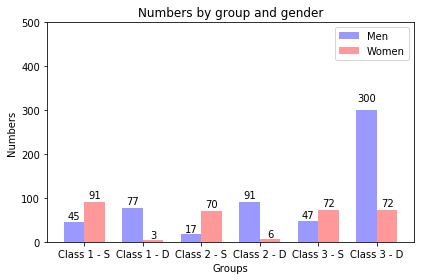

In [146]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 6

means_men = (45, 77, 17, 91, 47, 300)

means_women = (91, 3, 70, 6, 72, 72)

# The number are entered as follow, starting with Class 1, down to 3:
# male Total Number - male Survived - female Total Number - female Survived, etc.

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}
# Adjusting the color saturation

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Women')

ax.set_xlabel('Groups')
ax.set_ylabel('Numbers')
ax.set_title('Numbers by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Class 1 - S', 'Class 1 - D','Class 2 - S', 'Class 2 - D','Class 3 - S', 'Class 3 - D'))
plt.yticks(np.arange(0, 600, 100))
ax.legend()

fig.tight_layout()

# For easier understanding and presentability the bars can also be labeled

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)



plt.show()

In [147]:
# As shown from the previous bar chart, women may have been given way to first leave. However, now its vissible,
# that the biggest difference is in Class1 and Class2. There, the number of female deaths is quite small.
# In Class 3, female death equal the number of survivors.

# Men in Class 1 and Class 2 have less difference in Survivors and Dead, where in Class 3 the difference is big.
# A little more than 1/10 of them have survived

# This chart is another proof that people from the higher floors with higher Pclass may have had the privilage
# to leave first.

### 4 - Age

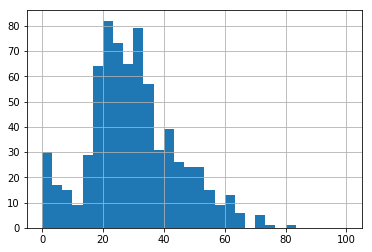

In [148]:
# Showind the variety of the age in the Total number of passengers

df['Age'].hist(bins = 30, range = (0,100))
plt.show()

# if:
# Children = 0-18
# Adults   = 18-65
# Elderly people = 65+
# It can be said the majority in these three groups is the Adults

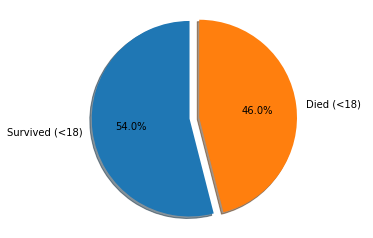

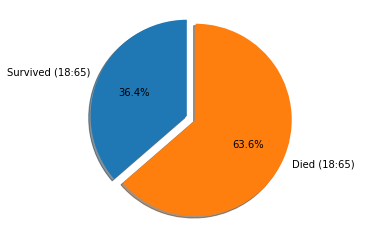

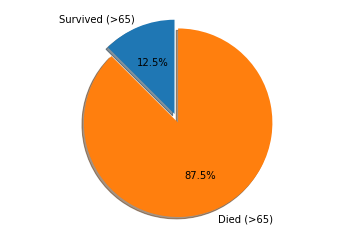

In [149]:
# The next step is to find out who survived and who did not from all the three groups


# CHILDREN

Survived = df.loc[(df["Survived"] == 1) & (df["Age"] < 18)].Sex.count()
Died = df.loc[(df["Survived"] == 0) & (df["Age"] < 18)].Sex.count()

labels = 'Survived (<18)', 'Died (<18)'
sizes = [Survived, Died]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


# -----------------------------------

# ADULT


Survived = df.loc[(df["Survived"] == 1) & (df["Age"][18:65])].Sex.count()
Died = df.loc[(df["Survived"] == 0) & (df["Age"][18:65])].Sex.count()

labels = 'Survived (18:65)', 'Died (18:65)'
sizes = [Survived, Died]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


# -----------------------------------

# ELDERLY PEOPLE


Survived = df.loc[(df["Survived"] == 1) & (df["Age"] > 65)].Sex.count()
Died = df.loc[(df["Survived"] == 0) & (df["Age"] > 65)].Sex.count()

labels = 'Survived (>65)', 'Died (>65)'
sizes = [Survived, Died]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')



plt.show()
# I need only one time to call the action



In [150]:
# There are gaps in the Age column but according ot the given the an estimation can be made
# The amound of survivors is the biggest in the CHILGREN group, then the ADULTS and finally the ELDERLY PEOPLE
# It may be so because people would always try to save the kids first, then themselves and the last saved may be the
# the elderly people because of their chances of survival

# This information also depends on where they were alocated on the ship and also their family size
# Presumably the children were with their families and they had bigger chances of survival as their parents helped them
# Or maybe they tried to save their children first


# This lead to the next step where the Family needs to be avaluated

### 5 - Family

In [151]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1

# The Family Size is not in the data, therefore it needs to be extracted by the rest of the shown information.
# Summarizing the Siblings and the Parants + 1 for the passenger will give us the size of the whole family
# of that particular passenger

In [152]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [153]:
pd.crosstab(df["Survived"],df["FamilySize"])

# This step is to determine the relationship between the size of the family and the survivors in each group
# Showing the info in numbers

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


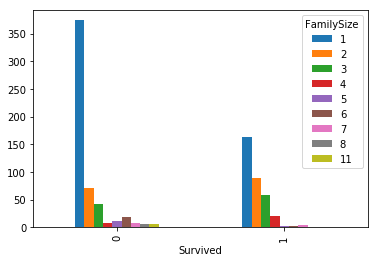

In [154]:

pd.crosstab(df["Survived"],df["FamilySize"]).plot(kind="bar")
plt.show()
# Visual representation of the above information
# The numbers of survivors are degrading from 1 to 11
# This leads to the idea that the smaller the FamilySize is the more survivors were
# Meaning that the people who traveled alone were with the highest ratio of survivors
# The people within a family of 2 are next and their numbers are almost half of the people traveling without family
# This may be because the big familly will try to stay together as a group and will be slow to move from 
# one to another location and they will try to help each other, which will slow them down

In [155]:
pd.crosstab(df["Pclass"],df["FamilySize"])

# The variaty of families in the different classes will show us the families and the individuals according to their Pclass

FamilySize,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1,109,70,24,7,2,4,0,0,0
2,104,34,31,13,1,1,0,0,0
3,324,57,47,9,12,17,12,6,7


In [156]:
# what is noticeable is that in Pclass 1 and 2 the families are no bigger than 6 people
# In Class 3 the Family variaty is most and the individuals group is about 3 time bigger than in Class 1 and 2

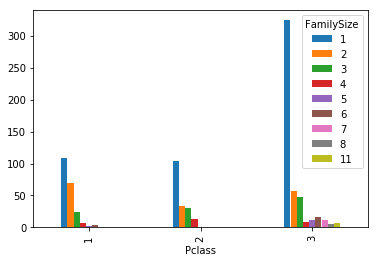

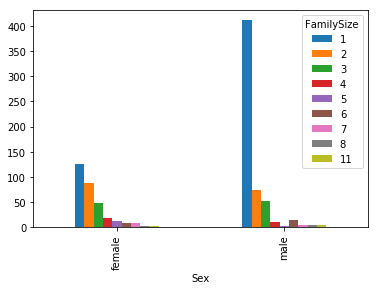

In [157]:
pd.crosstab(df["Pclass"],df["FamilySize"]).plot(kind="bar")
plt.show()

pd.crosstab(df["Sex"],df["FamilySize"]).plot(kind="bar")
plt.show()

In [158]:
# The visual difference in Class 1 and 2 is in the families of 2 people
# Class 3 is with the most individuals and biggest family variaty

In [159]:
# Another evaluation of the Family size can be made according to gender
# It looks like the difference here is in the individuals groups, where in the families the difference is not that big.

### 6 - Class and Fare

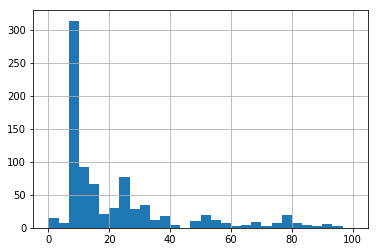

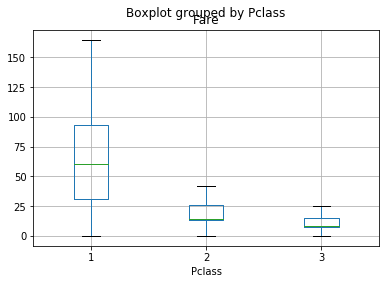

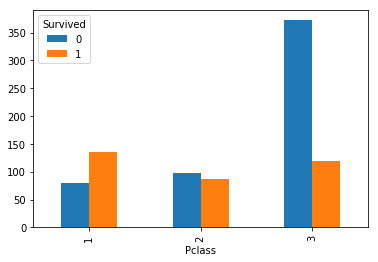

In [160]:
df['Fare'].hist(bins = 30, range = (0,100))


#--------------------

plt.figure()
df.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

#--------------------

pd.crosstab(df["Pclass"],df["Survived"]).plot(kind="bar")
plt.show()

In [161]:
# After visualizing and examining the three graphics it is clear that there is a relation between
# the ratio of survivors and dead between the Pclass and the Fare

### 7 - Embarked

In [162]:
pd.crosstab(df["Survived"],df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


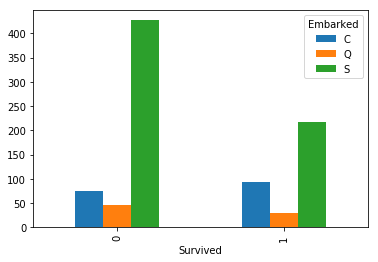

In [163]:
pd.crosstab(df["Survived"],df["Embarked"]).plot(kind="bar")
plt.show()

In [164]:
# According to the bar chart and the date above, the highest death ratio is "S", than it is "Q" and the last one is "C"

### Conclusion

##### In Total: more women than men did survive and the majority of people were middle or lower class people, placed in Pclass 3
##### The people who survived most are from Class 1 followed by 2 and 3.
##### The higher the Pclass may be so that the cabin is on the higher floors, thus leading to better chances of escape
##### The most survivors in Class 1 and 2 are female. Females in  Class 1 and 2 have only a few deaths. In Class 3 is 50% - 50%
##### Women may have been given way to escape but in that also matters their location. Although if judged from the info the Class matters.
##### Children, Adults and Elderly people - even if the Adults are the biggest group, the Children have the highest ration of survivors,
##### followed by the Adults and the Elderly people group.
##### Family Size - the bigger the family is the smaller the number of survivors is.
##### Individuals, traveling without family have the highest ration of survivors in these groups.
##### Family Variety: big difference in family size between Class1+2 and 3.
##### Class 1 and 2 were mostly family passengers where in 3 the individuals groups is outstanding. But the ratio of total survivals in Class 3 is not so big.
##### Fare - There is a visible connection between the passengers class, the fare and the ratio of survivors.

#### Summary: The Pclass did matter as well as the fare, the higher it is the higher is number of survivors. The familysize also is a factor, the smaller it is the higher is the number of survivors. The Gender also did matter, there are more female survivors than male. The group age takes part too, where the ratio between total number and survivors is the highest in the young people and it lowers as the age is growing - as follows, - Childre-Adults-Elderly people.


In [165]:
# I have to give credits to Matplotlib and their examples of coding for the charts
# And also to the Lessons in Jupyter, they helped me a lot when I started